<a href="https://colab.research.google.com/github/sophieaea/node_test1/blob/main/8_test_keras_opensmile_feature_97_25_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##GPU_Information

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Jul 16 08:40:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              44W / 350W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
# @title RAM - 고용량
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# @title IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import keras
import librosa

import os
import sys

!pip install numpy pandas librosa IPython
!sudo pip install keras
!pip install np_utils
!pip install --upgrade librosa
!pip install audioread
!pip install soundfile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=0e0bd3b33c40ef779be01e60a6d045a0e0f8f470f273bdd3f0b2bd295ed946a8
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# to play the audio files
import IPython.display as ipd # 모델 1이랑 달라진 부분
from IPython.display import Audio

import audioread

import soundfile as sf
import np_utils

In [ ]:
#model 1에서 추가됨 모델 라이브러리
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [ ]:
#모델1에 해당하는 라이브러리 임포트
'''#from tensorflow.keras.utils import to_categorical
#from keras.utils import np_utils
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
#from keras.utils import np_utils, to_categorical
#from keras.utils import np_utils
#from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint'''

'#from tensorflow.keras.utils import to_categorical\n#from keras.utils import np_utils\nfrom keras.utils import to_categorical\nfrom keras.callbacks import ReduceLROnPlateau\nfrom keras.models import Sequential\nfrom keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization\n#from keras.utils import np_utils, to_categorical\n#from keras.utils import np_utils\n#from keras.utils.np_utils import to_categorical\nfrom keras.callbacks import ModelCheckpoint'

In [ ]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
!apt-get update
!apt-get install -y libsndfile1#libsndfile은 오디오 파일을 읽고 쓰기 위해 Erik de Castro Lopo가 작성한 널리 사용되는 C 라이브러리
#!pip install ffmpeg-python
#!pip install pydub

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Ign:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,034 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:14 https://ppa.launchp

In [ ]:
'''from google.colab import auth
auth.authenticate_user()'''
# connect google drive
from google.colab import drive
drive.mount('/content/drive') #실행 20s
import tensorflow as tf
print ("Done")

Mounted at /content/drive
Done


In [ ]:
# Paths for data.
Ravdess = "/content/drive/MyDrive/datasets/Ravdess/audio_speech_actors_01-24"
Crema = "/content/drive/MyDrive/datasets/Crema-D"
Tess = "/content/drive/MyDrive/datasets/Tess"
Savee = "/content/drive/MyDrive/datasets/Savee"

In [ ]:
# List all directories
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []

# Iterate through each actor's directory
for dir in ravdess_directory_list:
    if dir.startswith("Actor_"):
        actor_path = os.path.join(Ravdess, dir)
        actor_files = os.listdir(actor_path)
        # Extract files for each actor
        for file in actor_files:
            full_path = os.path.join(actor_path, file)
            file_path.append(full_path)
            part = file.split('.')[0].split('-')
            # Third part in each file represents the emotion associated with that file
            if len(part) > 2:  # Check if there are enough elements -> 체크하기
                file_emotion.append(int(part[2]))
            #file_emotion.append(int(part[2]))

# Dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# Dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Changing integers to actual emotions
Ravdess_df.Emotions.replace({
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fear',
    7: 'disgust',
    8: 'surprise'



}, inplace=True)

'''# Save the dataframe to CSV for verification
csv_file_path = '/content/drive/MyDrive/datasets/ravdess_file_paths.csv'
Ravdess_df.to_csv(csv_file_path, index=False)

print(f"Ravdess file paths have been saved to {csv_file_path}")'''
Ravdess_df.head()



,Emotions,Path
0,disgust,/content/drive/MyDrive/datasets/Ravdess/audio_...
1,fear,/content/drive/MyDrive/datasets/Ravdess/audio_...
2,angry,/content/drive/MyDrive/datasets/Ravdess/audio_...
3,sad,/content/drive/MyDrive/datasets/Ravdess/audio_...
4,happy,/content/drive/MyDrive/datasets/Ravdess/audio_...


In [ ]:
# prompt: Ravdess_df DataFrame 사용: Number of emotions by ravdess

Ravdess_df['Emotions'].value_counts()


Emotions
disgust     192
fear        192
angry       192
sad         192
happy       192
calm        192
surprise    192
neutral      96
Name: count, dtype: int64

In [ ]:
# prompt: Ravdess_df DataFrame 사용: emotion's number

Ravdess_df['Emotions'].nunique()


8

In [ ]:
'''print(Ravdess_df.head())'''

'''print(Ravdess_df.head())
print(Ravdess_df.shape)
print(Ravdess_df.Emotions.value_counts())
print(Ravdess_df.describe())
print(Ravdess_df.info())
print(Ravdess_df.isnull().sum())
print(Ravdess_df.duplicated().sum())
print(Ravdess_df.nunique())
print(Ravdess_df.dtypes)
print(Ravdess_df.shape)'''

'print(Ravdess_df.head())\nprint(Ravdess_df.shape)\nprint(Ravdess_df.Emotions.value_counts())\nprint(Ravdess_df.describe())\nprint(Ravdess_df.info())\nprint(Ravdess_df.isnull().sum())\nprint(Ravdess_df.duplicated().sum())\nprint(Ravdess_df.nunique())\nprint(Ravdess_df.dtypes)\nprint(Ravdess_df.shape)'

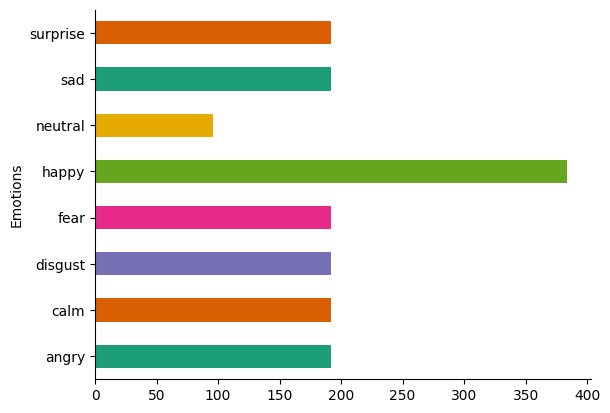

In [ ]:
# @title Emotions

from matplotlib import pyplot as plt
import seaborn as sns
Ravdess_df.groupby('Emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema +'/'+ file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
'''print(Crema_df.head())'''


'''# Save the dataframe to CSV for verification
csv_file_path = '/content/drive/MyDrive/datasets/Crema_file_paths.csv'
Crema_df.to_csv(csv_file_path, index=False)

print(f"Crema file paths have been saved to {csv_file_path}")'''



'# Save the dataframe to CSV for verification\ncsv_file_path = \'/content/drive/MyDrive/datasets/Crema_file_paths.csv\'\nCrema_df.to_csv(csv_file_path, index=False)\n\nprint(f"Crema file paths have been saved to {csv_file_path}")'

In [ ]:
# prompt: Crema_df DataFrame 사용: Number of emotions by Crema_df

Crema_df['Emotions'].value_counts()


Emotions
happy      1492
disgust    1271
angry      1271
sad        1271
fear       1271
neutral    1087
Name: count, dtype: int64

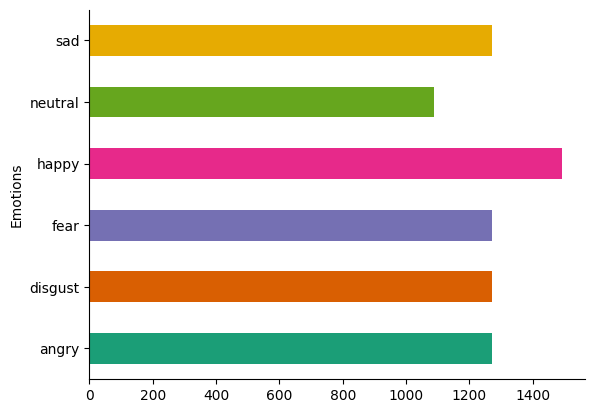

In [ ]:
# @title Emotions

from matplotlib import pyplot as plt
import seaborn as sns
Crema_df.groupby('Emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##Tess

In [ ]:

file_emotion = []
file_path = []

# Tess 폴더 내의 모든 디렉토리를 리스트업
tess_directory_list = os.listdir(Tess)

for dir in tess_directory_list:
    # 폴더명이 OAF_ 또는 YAF_로 시작하는 경우에만 처리
    if dir.startswith("OAF_") or dir.startswith("YAF_"):
        # 각 디렉토리 내의 파일들 리스트업
        files = os.listdir(os.path.join(Tess, dir))
        for file in files:
            # 파일명에서 감정 부분 추출 (예: OAF_Fear_angry.wav -> angry)
            parts = file.split('_')
            emotion = parts[-1].split('.')[0]  # 파일 확장자 제거
            if emotion == 'ps':
                emotion = 'surprise'
            elif emotion == 'pleasant':
                emotion = 'pleasant_surprise'

            # 추출한 감정과 파일 경로를 리스트에 추가
            file_emotion.append(emotion)
            file_path.append(os.path.join(Tess, dir, file))

# 감정 데이터와 경로 데이터를 데이터프레임으로 생성
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

# 두 데이터프레임을 합침
Tess_df = pd.concat([emotion_df, path_df], axis=1)


'''# Save the dataframe to CSV for verification
csv_file_path = '/content/drive/MyDrive/datasets/Tess_file_paths.csv'
Tess_df.to_csv(csv_file_path, index=False)

print(f"Tess file paths have been saved to {csv_file_path}")'''

# 결과 확인
Tess_df.head()

,Emotions,Path
0,surprise,/content/drive/MyDrive/datasets/Tess/YAF_pleas...
1,surprise,/content/drive/MyDrive/datasets/Tess/YAF_pleas...
2,surprise,/content/drive/MyDrive/datasets/Tess/YAF_pleas...
3,surprise,/content/drive/MyDrive/datasets/Tess/YAF_pleas...
4,surprise,/content/drive/MyDrive/datasets/Tess/YAF_pleas...


In [ ]:
# prompt: Tess_df DataFrame 사용: Number of emotions by Tess

Tess_df['Emotions'].value_counts()


Emotions
happy       500
surprise    400
neutral     400
angry       400
sad         400
disgust     400
fear        400
Name: count, dtype: int64

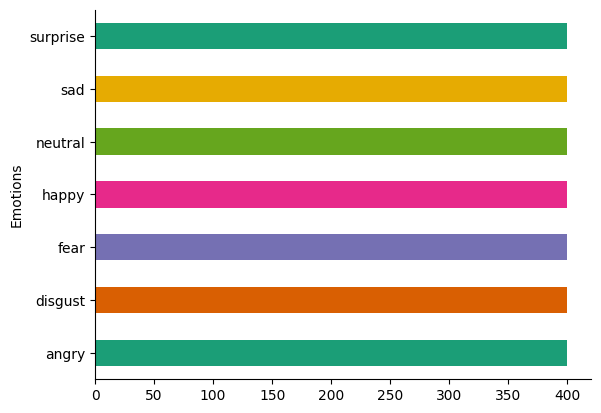

In [ ]:
# @title Emotions

from matplotlib import pyplot as plt
import seaborn as sns
Tess_df.groupby('Emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee+'/'+ file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

'''# Save the dataframe to CSV for verification
csv_file_path = '/content/drive/MyDrive/datasets/Savee_file_paths.csv'
Savee_df.to_csv(csv_file_path, index=False)

print(f"Savee file paths have been saved to {csv_file_path}")
Savee_df.head()'''

'# Save the dataframe to CSV for verification\ncsv_file_path = \'/content/drive/MyDrive/datasets/Savee_file_paths.csv\'\nSavee_df.to_csv(csv_file_path, index=False)\n\nprint(f"Savee file paths have been saved to {csv_file_path}")\nSavee_df.head()'

In [ ]:
# prompt: Savee_df DataFrame 사용: Number of emotions by Savee

Savee_df['Emotions'].value_counts()


Emotions
neutral     120
angry        60
disgust      60
fear         60
happy        60
surprise     60
sad          60
Name: count, dtype: int64

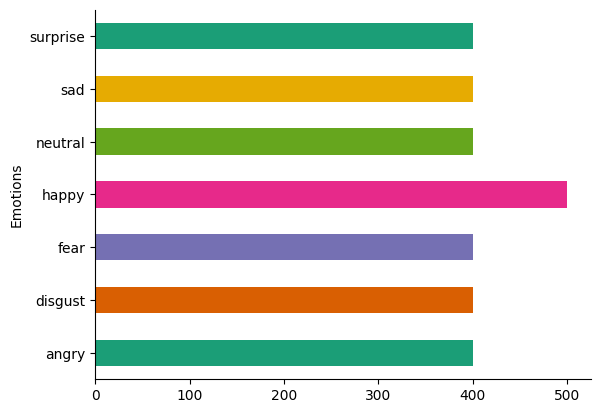

In [ ]:
# @title Emotions

from matplotlib import pyplot as plt
import seaborn as sns
Tess_df.groupby('Emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from pathlib import Path

In [ ]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,disgust,/content/drive/MyDrive/datasets/Ravdess/audio_...
1,fear,/content/drive/MyDrive/datasets/Ravdess/audio_...
2,angry,/content/drive/MyDrive/datasets/Ravdess/audio_...
3,sad,/content/drive/MyDrive/datasets/Ravdess/audio_...
4,happy,/content/drive/MyDrive/datasets/Ravdess/audio_...


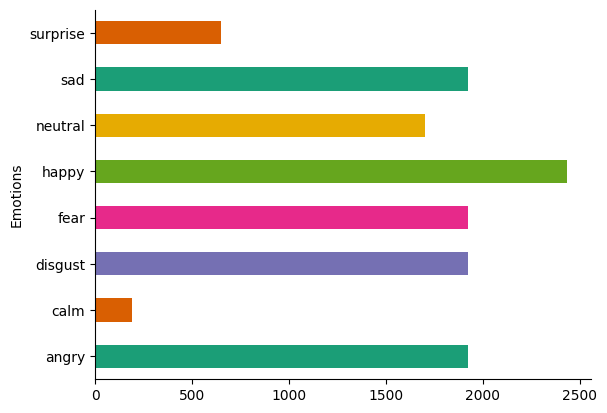

In [ ]:
# @title Emotions
data_path.groupby('Emotions').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
'''# prompt: Savee_df DataFrame 사용: Number of emotions by Savee

Savee_df['Emotions'].value_counts()
'''

# prompt: data_path DataFrame 사용: Number of emotions by data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)

data_path.groupby('Emotions').size().reset_index(name='count')


,Emotions,count
0,angry,1923
1,calm,192
2,disgust,1923
3,fear,1923
4,happy,2436
5,neutral,1703
6,sad,1923
7,surprise,652


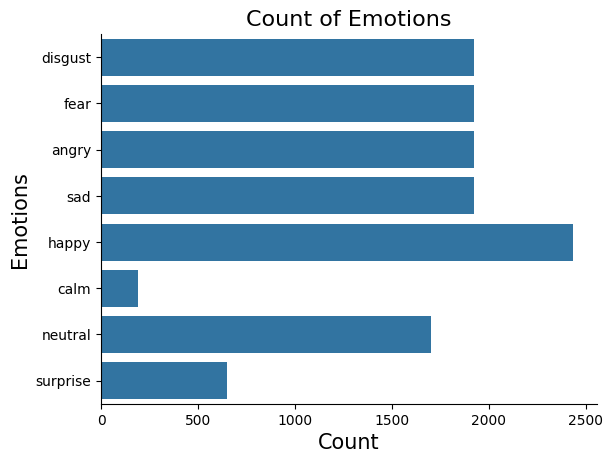

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Emotions', size=15)
plt.xlabel('Count', size=15)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

##only happy data csv

In [ ]:
'''# Assuming the DataFrames are already created and named Ravdess_df, Crema_df, Tess_df, Savee_df
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)

# Filtering the DataFrame to get only the rows where the emotion is "happy"
happy_df = data_path[data_path.Emotions == 'happy']

# Saving the filtered DataFrame to a CSV file
happy_df.to_csv("happy_data.csv", index=False)

# Display the first few rows of the happy DataFrame
happy_df.head()'''

,Emotions,Path
4,happy,/content/drive/MyDrive/datasets/Ravdess/audio_...
22,happy,/content/drive/MyDrive/datasets/Ravdess/audio_...
26,happy,/content/drive/MyDrive/datasets/Ravdess/audio_...
29,happy,/content/drive/MyDrive/datasets/Ravdess/audio_...
38,happy,/content/drive/MyDrive/datasets/Ravdess/audio_...


##opensmile

In [ ]:
!pip install opensmile

import opensmile
import os


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.2/996.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iso-639: filename=iso_639-0.4.5-py3-none-any.whl size=168840 sha256=762982b5b87801a3e2035649e22cb0335b23af8d9dbb64091dcd7a1d688c4e91
  Stored in directory: /root/.cache/pip/wheels/d8/78/cc/5478ca3b1c3f602eae6f8cdbd78f909c0a0bfa0bbcb5c7771f
Successfully built iso-639


##happy

In [ ]:
import os
import opensmile
import pandas as pd

# Initialize the OpenSMILE feature extractor
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# Assuming the DataFrames are already created and named Ravdess_df, Crema_df, Tess_df, Savee_df
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)

# Filtering the DataFrame to get only the rows where the emotion is "happy"
happy_df = data_path[data_path.Emotions == 'happy']

# Display the first few rows of the happy_df DataFrame
print(happy_df.head())

# Create the output directory for happy features if it doesn't exist
output_dir = 'happy_opensmile_features'
os.makedirs(output_dir, exist_ok=True)

# Process each "happy" file and save the results to a CSV file in the happy_features directory
for file_path in happy_df['Path']:
    # Process the file
    y = smile.process_file(file_path)

    # Get the base name of the file and define the output CSV file path
    base_name = os.path.basename(file_path)
    output_csv_path = os.path.join(output_dir, f"{base_name}.csv")

    # Save the DataFrame to a CSV file
    y.to_csv(output_csv_path, index=False)

    # Print a confirmation message
    print(f"Features for {file_path} saved to {output_csv_path}")


In [ ]:
import pandas as pd
import os

# CSV 파일들이 저장된 디렉터리 경로
market_dir = '/content/drive/MyDrive/happy_opensmile_features'

# 빈 딕셔너리 생성
market_data = {}

# 디렉터리 내의 모든 파일 목록 가져오기
market_list = [file for file in os.listdir(market_dir) if file.endswith('.csv')]

# 각 파일을 불러와서 딕셔너리에 저장
for market in market_list:
    market_path = os.path.join(market_dir, market)
    market_data[market] = pd.read_csv(market_path)

# 모든 데이터를 합치기
all_data = pd.concat(market_data.values(), ignore_index=True)

# csv 파일로 저장
all_data.to_csv(os.path.join(market_dir, 'happy_opensmile_features_combined_data.csv'), index=False)

print('CSV files have been combined and saved successfully.')


##angry

In [ ]:
import os
import opensmile
import pandas as pd

# Initialize the OpenSMILE feature extractor
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# Assuming the DataFrames are already created and named Ravdess_df, Crema_df, Tess_df, Savee_df
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)

# Filtering the DataFrame to get only the rows where the emotion is "happy"
angry_df = data_path[data_path.Emotions == 'angry']

# Display the first few rows of the happy_df DataFrame
print(angry_df.head())

# Create the output directory for happy features if it doesn't exist
output_dir = '/content/drive/MyDrive/datasets/angry_opensmile_features'
os.makedirs(output_dir, exist_ok=True)

# Process each "angry" file and save the results to a CSV file in the angry_features directory
for file_path in angry_df['Path']:
    # Process the file
    y = smile.process_file(file_path)

    # Get the base name of the file and define the output CSV file path
    base_name = os.path.basename(file_path)
    output_csv_path = os.path.join(output_dir, f"{base_name}.csv")

    # Save the DataFrame to a CSV file
    y.to_csv(output_csv_path, index=False)

    # Print a confirmation message
    print(f"Features for {file_path} saved to {output_csv_path}")


   Emotions                                               Path
2     angry  /content/drive/MyDrive/datasets/Ravdess/audio_...
5     angry  /content/drive/MyDrive/datasets/Ravdess/audio_...
9     angry  /content/drive/MyDrive/datasets/Ravdess/audio_...
11    angry  /content/drive/MyDrive/datasets/Ravdess/audio_...
14    angry  /content/drive/MyDrive/datasets/Ravdess/audio_...
Features for /content/drive/MyDrive/datasets/Ravdess/audio_speech_actors_01-24/Actor_22/03-01-05-02-01-01-22.wav saved to /content/drive/MyDrive/datasets/angry_opensmile_features/03-01-05-02-01-01-22.wav.csv
Features for /content/drive/MyDrive/datasets/Ravdess/audio_speech_actors_01-24/Actor_22/03-01-05-01-02-02-22.wav saved to /content/drive/MyDrive/datasets/angry_opensmile_features/03-01-05-01-02-02-22.wav.csv
Features for /content/drive/MyDrive/datasets/Ravdess/audio_speech_actors_01-24/Actor_22/03-01-05-01-02-01-22.wav saved to /content/drive/MyDrive/datasets/angry_opensmile_features/03-01-05-01-02-01-22.wav.cs

In [ ]:
import pandas as pd
import os

# CSV 파일들이 저장된 디렉터리 경로
market_dir = '/content/drive/MyDrive/angry_opensmile_features'

# 빈 딕셔너리 생성
market_data = {}

# 디렉터리 내의 모든 파일 목록 가져오기
market_list = [file for file in os.listdir(market_dir) if file.endswith('.csv')]

# 각 파일을 불러와서 딕셔너리에 저장
for market in market_list:
    market_path = os.path.join(market_dir, market)
    market_data[market] = pd.read_csv(market_path)

# 모든 데이터를 합치기
all_data = pd.concat(market_data.values(), ignore_index=True)

# csv 파일로 저장
all_data.to_csv(os.path.join(market_dir, 'angry_opensmile_features_combined_data.csv'), index=False)

print('CSV files have been combined and saved successfully.')


CSV files have been combined and saved successfully.


##calm

In [ ]:
import os
import opensmile
import pandas as pd

# Initialize the OpenSMILE feature extractor
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# Assuming the DataFrames are already created and named Ravdess_df, Crema_df, Tess_df, Savee_df
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)

# Filtering the DataFrame to get only the rows where the emotion is "happy"
calm_df = data_path[data_path.Emotions == 'calm']

# Display the first few rows of the happy_df DataFrame
print(calm_df.head())

# Create the output directory for happy features if it doesn't exist
output_dir = '/content/drive/MyDrive/calm_opensmile_features'
os.makedirs(output_dir, exist_ok=True)

# Process each "calm" file and save the results to a CSV file in the happy_features directory
for file_path in calm_df['Path']:
    # Process the file
    y = smile.process_file(file_path)

    # Get the base name of the file and define the output CSV file path
    base_name = os.path.basename(file_path)
    output_csv_path = os.path.join(output_dir, f"{base_name}.csv")

    # Save the DataFrame to a CSV file
    y.to_csv(output_csv_path, index=False)

    # Print a confirmation message
    print(f"Features for {file_path} saved to {output_csv_path}")


In [ ]:
import pandas as pd
import os

# CSV 파일들이 저장된 디렉터리 경로
market_dir = '/content/drive/MyDrive/calm_opensmile_features'

# 빈 딕셔너리 생성
market_data = {}

# 디렉터리 내의 모든 파일 목록 가져오기
market_list = [file for file in os.listdir(market_dir) if file.endswith('.csv')]

# 각 파일을 불러와서 딕셔너리에 저장
for market in market_list:
    market_path = os.path.join(market_dir, market)
    market_data[market] = pd.read_csv(market_path)

# 모든 데이터를 합치기
all_data = pd.concat(market_data.values(), ignore_index=True)

# csv 파일로 저장
all_data.to_csv(os.path.join(market_dir, 'calm_opensmile_features_combined_data.csv'), index=False)

print('CSV files have been combined and saved successfully.')


##disgust

In [ ]:
import pandas as pd
import os

# CSV 파일들이 저장된 디렉터리 경로
market_dir = '/content/drive/MyDrive/disgust_opensmile_features'

# 빈 딕셔너리 생성
market_data = {}

# 디렉터리 내의 모든 파일 목록 가져오기
market_list = [file for file in os.listdir(market_dir) if file.endswith('.csv')]

# 각 파일을 불러와서 딕셔너리에 저장
for market in market_list:
    market_path = os.path.join(market_dir, market)
    market_data[market] = pd.read_csv(market_path)

# 모든 데이터를 합치기
all_data = pd.concat(market_data.values(), ignore_index=True)

# csv 파일로 저장
all_data.to_csv(os.path.join(market_dir, 'disgust_opensmile_features_combined_data.csv'), index=False)

print('CSV files have been combined and saved successfully.')


In [ ]:
import pandas as pd
import os

# CSV 파일들이 저장된 디렉터리 경로
market_dir = '/content/drive/MyDrive/disgust_opensmile_features'

# 빈 딕셔너리 생성
market_data = {}

# 디렉터리 내의 모든 파일 목록 가져오기
market_list = [file for file in os.listdir(market_dir) if file.endswith('.csv')]

# 각 파일을 불러와서 딕셔너리에 저장
for market in market_list:
    market_path = os.path.join(market_dir, market)
    market_data[market] = pd.read_csv(market_path)

# 모든 데이터를 합치기
all_data = pd.concat(market_data.values(), ignore_index=True)

# csv 파일로 저장
all_data.to_csv(os.path.join(market_dir, 'disgust_opensmile_features_combined_data.csv'), index=False)

print('CSV files have been combined and saved successfully.')


##fear

In [ ]:
import os
import opensmile
import pandas as pd

# Initialize the OpenSMILE feature extractor
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# Assuming the DataFrames are already created and named Ravdess_df, Crema_df, Tess_df, Savee_df
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)

# Filtering the DataFrame to get only the rows where the emotion is "fear"
fear_df = data_path[data_path.Emotions == 'fear']

# Display the first few rows of the fear_df DataFrame
print(fear_df.head())

# Create the output directory for fear features if it doesn't exist
output_dir = '/content/drive/MyDrive/fear_opensmile_features'
os.makedirs(output_dir, exist_ok=True)

# Process each "fear" file and save the results to a CSV file in the fear_features directory
for file_path in fear_df['Path']:
    # Process the file
    y = smile.process_file(file_path)

    # Get the base name of the file and define the output CSV file path
    base_name = os.path.basename(file_path)
    output_csv_path = os.path.join(output_dir, f"{base_name}.csv")

    # Save the DataFrame to a CSV file
    y.to_csv(output_csv_path, index=False)

    # Print a confirmation message
    print(f"Features for {file_path} saved to {output_csv_path}")


In [ ]:
import pandas as pd
import os

# CSV 파일들이 저장된 디렉터리 경로
market_dir = '/content/drive/MyDrive/fear_opensmile_features'

# 빈 딕셔너리 생성
market_data = {}

# 디렉터리 내의 모든 파일 목록 가져오기
market_list = [file for file in os.listdir(market_dir) if file.endswith('.csv')]

# 각 파일을 불러와서 딕셔너리에 저장
for market in market_list:
    market_path = os.path.join(market_dir, market)
    market_data[market] = pd.read_csv(market_path)

# 모든 데이터를 합치기
all_data = pd.concat(market_data.values(), ignore_index=True)

# csv 파일로 저장
all_data.to_csv(os.path.join(market_dir, 'fear_opensmile_features_combined_data.csv'), index=False)

print('CSV files have been combined and saved successfully.')


##neutral

In [ ]:
import os
import opensmile
import pandas as pd

# Initialize the OpenSMILE feature extractor
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# Assuming the DataFrames are already created and named Ravdess_df, Crema_df, Tess_df, Savee_df
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)

# Filtering the DataFrame to get only the rows where the emotion is "neutral"
neutral_df = data_path[data_path.Emotions == 'neutral']

# Display the first few rows of the neutral_df DataFrame
print(neutral_df.head())

# Create the output directory for neutral features if it doesn't exist
output_dir = '/content/drive/MyDrive/neutral_opensmile_features'
os.makedirs(output_dir, exist_ok=True)

# Process each "neutral" file and save the results to a CSV file in the neutral_features directory
for file_path in neutral_df['Path']:
    # Process the file
    y = smile.process_file(file_path)

    # Get the base name of the file and define the output CSV file path
    base_name = os.path.basename(file_path)
    output_csv_path = os.path.join(output_dir, f"{base_name}.csv")

    # Save the DataFrame to a CSV file
    y.to_csv(output_csv_path, index=False)

    # Print a confirmation message
    print(f"Features for {file_path} saved to {output_csv_path}")


   Emotions                                               Path
20  neutral  /content/drive/MyDrive/datasets/Ravdess/audio_...
31  neutral  /content/drive/MyDrive/datasets/Ravdess/audio_...
36  neutral  /content/drive/MyDrive/datasets/Ravdess/audio_...
47  neutral  /content/drive/MyDrive/datasets/Ravdess/audio_...
80  neutral  /content/drive/MyDrive/datasets/Ravdess/audio_...
Features for /content/drive/MyDrive/datasets/Ravdess/audio_speech_actors_01-24/Actor_22/03-01-01-01-02-02-22.wav saved to /content/drive/MyDrive/neutral_opensmile_features/03-01-01-01-02-02-22.wav.csv
Features for /content/drive/MyDrive/datasets/Ravdess/audio_speech_actors_01-24/Actor_22/03-01-01-01-01-01-22.wav saved to /content/drive/MyDrive/neutral_opensmile_features/03-01-01-01-01-01-22.wav.csv
Features for /content/drive/MyDrive/datasets/Ravdess/audio_speech_actors_01-24/Actor_22/03-01-01-01-02-01-22.wav saved to /content/drive/MyDrive/neutral_opensmile_features/03-01-01-01-02-01-22.wav.csv
Features for /conte

In [ ]:
import pandas as pd
import os

# CSV 파일들이 저장된 디렉터리 경로
market_dir = '/content/drive/MyDrive/neutral_opensmile_features'

# 빈 딕셔너리 생성
market_data = {}

# 디렉터리 내의 모든 파일 목록 가져오기
market_list = [file for file in os.listdir(market_dir) if file.endswith('.csv')]

# 각 파일을 불러와서 딕셔너리에 저장
for market in market_list:
    market_path = os.path.join(market_dir, market)
    market_data[market] = pd.read_csv(market_path)

# 모든 데이터를 합치기
all_data = pd.concat(market_data.values(), ignore_index=True)

# csv 파일로 저장
all_data.to_csv(os.path.join(market_dir, 'neutral_opensmile_features_combined_data.csv'), index=False)

print('CSV files have been combined and saved successfully.')


##sad


In [ ]:
import os
import opensmile
import pandas as pd

# Initialize the OpenSMILE feature extractor
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# Assuming the DataFrames are already created and named Ravdess_df, Crema_df, Tess_df, Savee_df
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)

# Filtering the DataFrame to get only the rows where the emotion is "sad"
sad_df = data_path[data_path.Emotions == 'sad']

# Display the first few rows of the sad_df DataFrame
print(sad_df.head())

# Create the output directory for sad features if it doesn't exist
output_dir = '/content/drive/MyDrive/sad_opensmile_features'
os.makedirs(output_dir, exist_ok=True)

# Process each "sad" file and save the results to a CSV file in the sad_features directory
for file_path in sad_df['Path']:
    # Process the file
    y = smile.process_file(file_path)

    # Get the base name of the file and define the output CSV file path
    base_name = os.path.basename(file_path)
    output_csv_path = os.path.join(output_dir, f"{base_name}.csv")

    # Save the DataFrame to a CSV file
    y.to_csv(output_csv_path, index=False)

    # Print a confirmation message
    print(f"Features for {file_path} saved to {output_csv_path}")


   Emotions                                               Path
3       sad  /content/drive/MyDrive/datasets/Ravdess/audio_...
7       sad  /content/drive/MyDrive/datasets/Ravdess/audio_...
12      sad  /content/drive/MyDrive/datasets/Ravdess/audio_...
19      sad  /content/drive/MyDrive/datasets/Ravdess/audio_...
23      sad  /content/drive/MyDrive/datasets/Ravdess/audio_...
Features for /content/drive/MyDrive/datasets/Ravdess/audio_speech_actors_01-24/Actor_22/03-01-04-02-01-01-22.wav saved to /content/drive/MyDrive/sad_opensmile_features/03-01-04-02-01-01-22.wav.csv
Features for /content/drive/MyDrive/datasets/Ravdess/audio_speech_actors_01-24/Actor_22/03-01-04-02-02-02-22.wav saved to /content/drive/MyDrive/sad_opensmile_features/03-01-04-02-02-02-22.wav.csv
Features for /content/drive/MyDrive/datasets/Ravdess/audio_speech_actors_01-24/Actor_22/03-01-04-01-01-01-22.wav saved to /content/drive/MyDrive/sad_opensmile_features/03-01-04-01-01-01-22.wav.csv
Features for /content/drive/MyD

In [ ]:
import pandas as pd
import os

# CSV 파일들이 저장된 디렉터리 경로
market_dir = '/content/drive/MyDrive/sad_opensmile_features'

# 빈 딕셔너리 생성
market_data = {}

# 디렉터리 내의 모든 파일 목록 가져오기
market_list = [file for file in os.listdir(market_dir) if file.endswith('.csv')]

# 각 파일을 불러와서 딕셔너리에 저장
for market in market_list:
    market_path = os.path.join(market_dir, market)
    market_data[market] = pd.read_csv(market_path)

# 모든 데이터를 합치기
all_data = pd.concat(market_data.values(), ignore_index=True)

# csv 파일로 저장
all_data.to_csv(os.path.join(market_dir, 'sad_opensmile_features_combined_data.csv'), index=False)

print('CSV files have been combined and saved successfully.')


CSV files have been combined and saved successfully.
CSV files have been combined and saved successfully.


##surprise

In [ ]:
import os
import opensmile
import pandas as pd

# Initialize the OpenSMILE feature extractor
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# Assuming the DataFrames are already created and named Ravdess_df, Crema_df, Tess_df, Savee_df
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis=0)

# Filtering the DataFrame to get only the rows where the emotion is "surprise"
surprise_df = data_path[data_path.Emotions == 'surprise']

# Display the first few rows of the surprise_df DataFrame
print(surprise_df.head())

# Create the output directory for sad features if it doesn't exist
output_dir = '/content/drive/MyDrive/surprise_opensmile_features'
os.makedirs(output_dir, exist_ok=True)

# Process each "sad" file and save the results to a CSV file in the sad_features directory
for file_path in sad_df['Path']:
    # Process the file
    y = smile.process_file(file_path)

    # Get the base name of the file and define the output CSV file path
    base_name = os.path.basename(file_path)
    output_csv_path = os.path.join(output_dir, f"{base_name}.csv")

    # Save the DataFrame to a CSV file
    y.to_csv(output_csv_path, index=False)

    # Print a confirmation message
    print(f"Features for {file_path} saved to {output_csv_path}")


    Emotions                                               Path
51  surprise  /content/drive/MyDrive/datasets/Ravdess/audio_...
52  surprise  /content/drive/MyDrive/datasets/Ravdess/audio_...
53  surprise  /content/drive/MyDrive/datasets/Ravdess/audio_...
54  surprise  /content/drive/MyDrive/datasets/Ravdess/audio_...
55  surprise  /content/drive/MyDrive/datasets/Ravdess/audio_...
Features for /content/drive/MyDrive/datasets/Ravdess/audio_speech_actors_01-24/Actor_22/03-01-04-02-01-01-22.wav saved to /content/drive/MyDrive/surprise_opensmile_features/03-01-04-02-01-01-22.wav.csv
Features for /content/drive/MyDrive/datasets/Ravdess/audio_speech_actors_01-24/Actor_22/03-01-04-02-02-02-22.wav saved to /content/drive/MyDrive/surprise_opensmile_features/03-01-04-02-02-02-22.wav.csv
Features for /content/drive/MyDrive/datasets/Ravdess/audio_speech_actors_01-24/Actor_22/03-01-04-01-01-01-22.wav saved to /content/drive/MyDrive/surprise_opensmile_features/03-01-04-01-01-01-22.wav.csv
Features f

In [ ]:
import pandas as pd
import os

# CSV 파일들이 저장된 디렉터리 경로
market_dir = '/content/drive/MyDrive/surprise_opensmile_features'

# 빈 딕셔너리 생성
market_data = {}

# 디렉터리 내의 모든 파일 목록 가져오기
market_list = [file for file in os.listdir(market_dir) if file.endswith('.csv')]

# 각 파일을 불러와서 딕셔너리에 저장
for market in market_list:
    market_path = os.path.join(market_dir, market)
    market_data[market] = pd.read_csv(market_path)

# 모든 데이터를 합치기
all_data = pd.concat(market_data.values(), ignore_index=True)

# csv 파일로 저장
all_data.to_csv(os.path.join(market_dir, 'surprise_opensmile_features_combined_data.csv'), index=False)

print('CSV files have been combined and saved successfully.')


CSV files have been combined and saved successfully.


#97.25%

In [ ]:
data,sr = librosa.load(file_path[0])#실행 12s
sr

22050

In [ ]:
ipd.Audio(data,rate=sr)


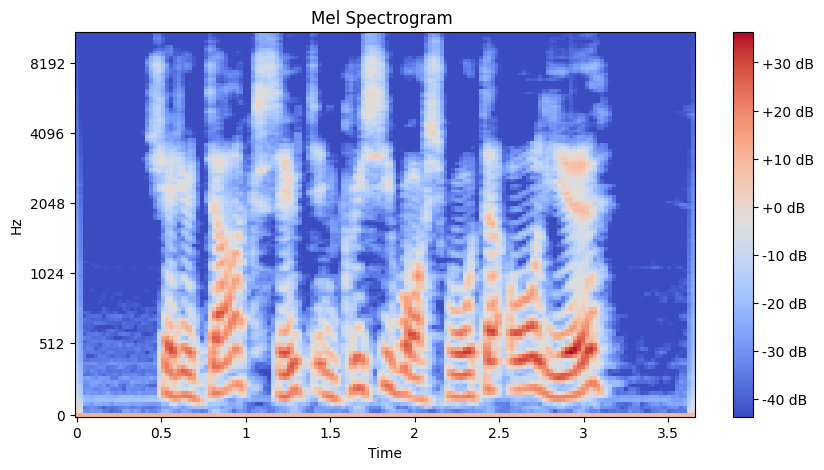

In [ ]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

"plt.figure(figsize=(16, 10))\nplt.subplot(3,1,1)\nlibrosa.display.specshow(mfcc, x_axis='time')\nplt.ylabel('MFCC')\nplt.colorbar()\n\nipd.Audio(data,rate=sr)"

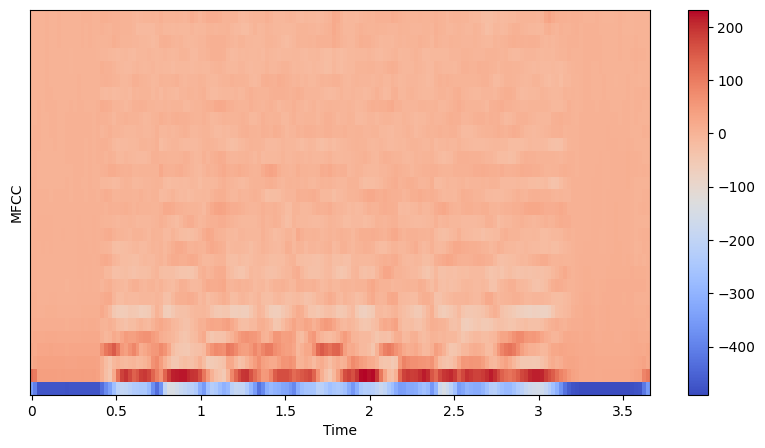

In [ ]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
#plt.figure(figsize=(16, 10))
plt.figure(figsize=(10, 5))
#plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

# 원본
'''plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)'''

In [ ]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)#rate = rate로 수정
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

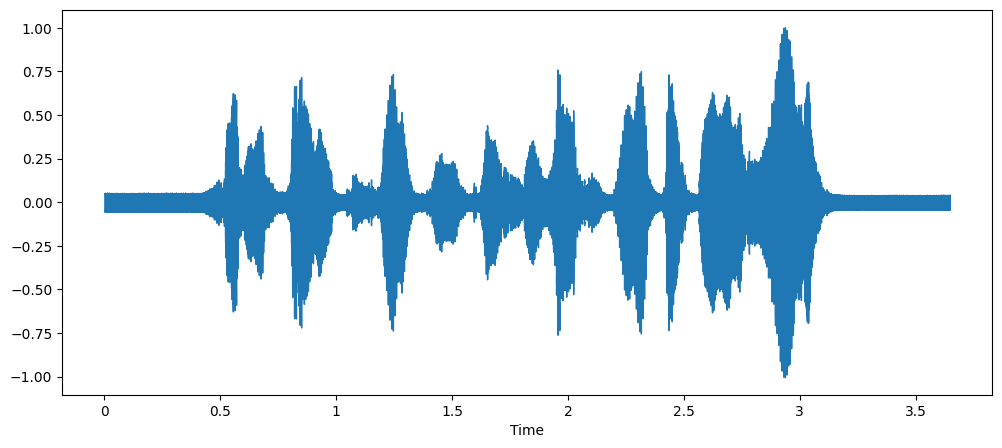

In [ ]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

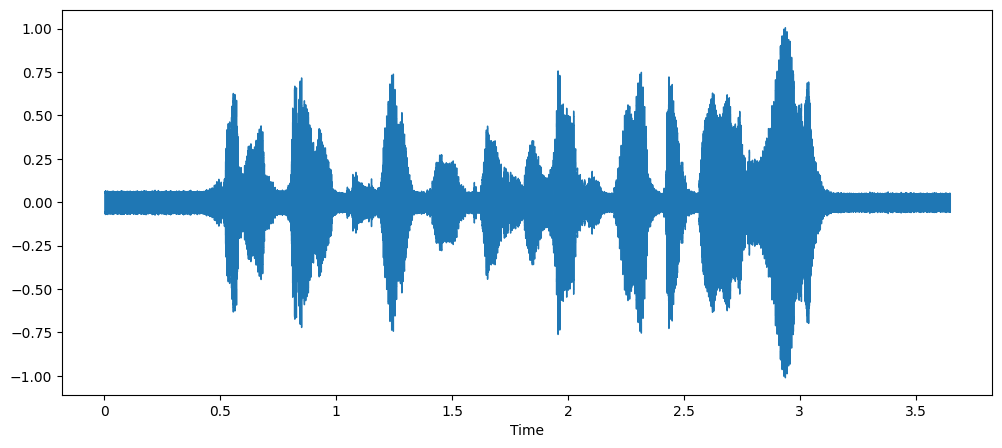

In [ ]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

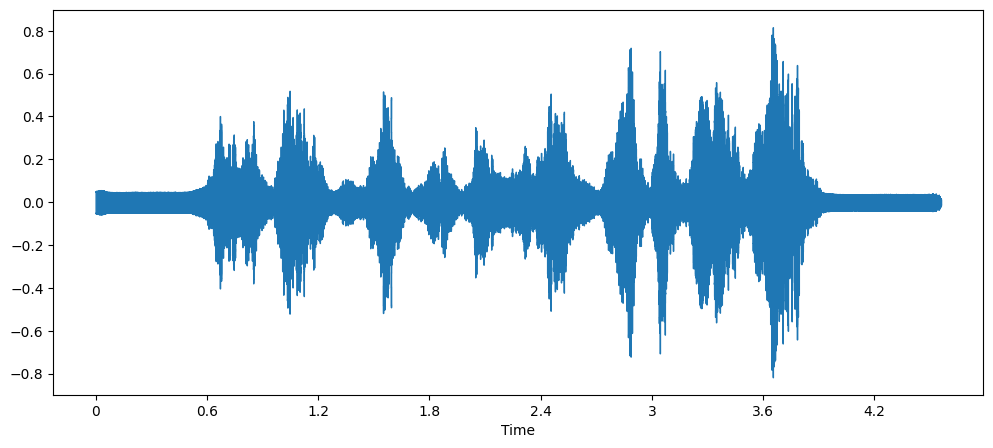

In [ ]:
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

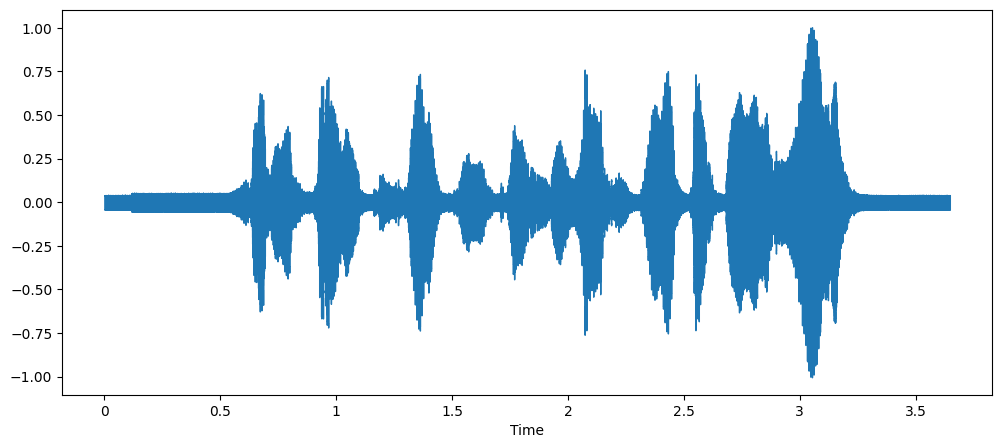

In [ ]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

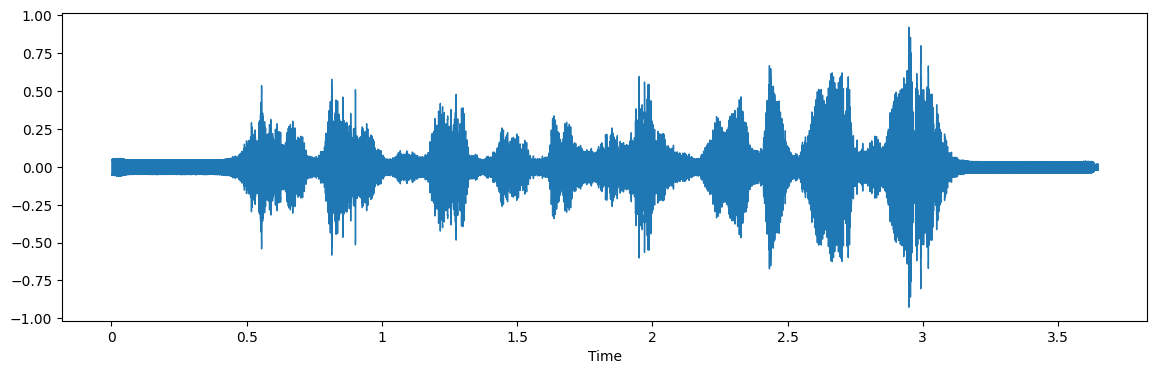

In [ ]:
# pitch 변환
def pitch(data, sr, n_steps=2):
    pitch_data = librosa.effects.pitch_shift(y=data, sr=sr, n_steps=n_steps)#y=data
    return pitch_data

# Apply pitch shifting
x = pitch(data, sr=sr)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sr)
plt.show()

# Audio output for pitch-shifted audio
display(Audio(x, rate=sr))

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sr)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [ ]:
'''import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)'''

"import timeit\nfrom tqdm import tqdm\nstart = timeit.default_timer()\nX,Y=[],[]\nfor path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):\n    features=get_features(path)\n    if index%500==0:\n        print(f'{index} audio has been processed')\n    for i in features:\n        X.append(i)\n        Y.append(emotion)\nprint('Done')\nstop = timeit.default_timer()\n\nprint('Time: ', stop - start)"

##1시간 30분(run time)

In [ ]:
import timeit
from tqdm import tqdm
import librosa

start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    # Check if the path is a valid audio file
    if path.endswith(('.wav', '.mp3', '.ogg')):  # Add other audio extensions if needed -> 파일 판단하는게 필요한 듯
        features=get_features(path)
        if index%500==0:
            print(f'{index} audio has been processed')
        for i in features:
            X.append(i)
            Y.append(emotion)
    else:
        print(f"Skipping non-audio file: {path}") # Inform the user about skipped files
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)

1it [00:01,  1.14s/it]

0 audio has been processed


501it [08:34,  1.03s/it]

500 audio has been processed


1001it [17:10,  1.14s/it]

1000 audio has been processed


1020it [17:29,  1.02s/it]

Skipping non-audio file: /content/drive/MyDrive/datasets/Ravdess/audio_speech_actors_01-24/Actor_01/.ipynb_checkpoints


1501it [25:39,  1.02it/s]

1500 audio has been processed


2001it [33:41,  1.04it/s]

2000 audio has been processed


2501it [41:47,  1.00it/s]

2500 audio has been processed


3001it [49:48,  1.04s/it]

3000 audio has been processed


3198it [53:02,  1.17it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
3501it [58:34,  1.71s/it]

3500 audio has been processed


4001it [1:06:45,  1.15it/s]

4000 audio has been processed


4501it [1:14:43,  1.14it/s]

4500 audio has been processed


5001it [1:22:38,  1.12it/s]

5000 audio has been processed


5501it [1:30:30,  1.04it/s]

5500 audio has been processed


6001it [1:38:26,  1.03s/it]

6000 audio has been processed


6501it [1:46:24,  1.05it/s]

6500 audio has been processed


7001it [1:54:16,  1.04it/s]

7000 audio has been processed


7501it [2:02:14,  1.07it/s]

7500 audio has been processed


8001it [2:10:17,  1.17it/s]

8000 audio has been processed


8501it [2:18:05,  1.10s/it]

8500 audio has been processed


9001it [2:26:05,  1.19it/s]

9000 audio has been processed


9501it [2:33:28,  1.22it/s]

9500 audio has been processed


10001it [2:40:50,  1.11it/s]

10000 audio has been processed


10501it [2:48:14,  1.18it/s]

10500 audio has been processed


11001it [2:55:40,  1.05it/s]

11000 audio has been processed


11501it [3:02:58,  1.14it/s]

11500 audio has been processed


12001it [3:10:46,  1.16s/it]

12000 audio has been processed


12163it [3:13:29,  1.05it/s]

Done
Time:  11609.957319908


In [ ]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12163,))

In [ ]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,Emotions
0,0.177979,0.601671,0.529629,0.547713,0.551179,0.668671,0.714268,0.577441,0.571666,0.601933,...,0.000077,0.000073,0.000062,0.000048,0.000046,0.000046,0.000034,0.000018,2.064118e-06,disgust
1,0.327063,0.762998,0.724313,0.722961,0.716097,0.775920,0.801487,0.678796,0.653949,0.673216,...,0.000844,0.000781,0.000763,0.000748,0.000736,0.000722,0.000706,0.000735,6.901785e-04,disgust
2,0.157227,0.589289,0.614491,0.550020,0.533370,0.515530,0.534328,0.687481,0.677464,0.546076,...,0.000021,0.000017,0.000008,0.000008,0.000014,0.000020,0.000012,0.000006,4.201216e-07,disgust
3,0.212705,0.565225,0.594250,0.686277,0.721022,0.654447,0.516010,0.510517,0.489639,0.541548,...,0.001061,0.001369,0.002086,0.002220,0.002688,0.002423,0.002254,0.001355,1.236979e-04,fear
4,0.269382,0.625229,0.600214,0.693905,0.778594,0.779492,0.646212,0.543516,0.516881,0.515353,...,0.001123,0.001432,0.002181,0.002334,0.002777,0.002464,0.002311,0.001423,2.030041e-04,fear


##2차 추가 코드

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# 이후에 model 돌리면 됨

NameError: name 'Features' is not defined

##1차 코드

In [ ]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,Emotions
0,0.177979,0.601671,0.529629,0.547713,0.551179,0.668671,0.714268,0.577441,0.571666,0.601933,...,0.000077,0.000073,0.000062,0.000048,0.000046,0.000046,0.000034,0.000018,2.064118e-06,disgust
1,0.327063,0.762998,0.724313,0.722961,0.716097,0.775920,0.801487,0.678796,0.653949,0.673216,...,0.000844,0.000781,0.000763,0.000748,0.000736,0.000722,0.000706,0.000735,6.901785e-04,disgust
2,0.157227,0.589289,0.614491,0.550020,0.533370,0.515530,0.534328,0.687481,0.677464,0.546076,...,0.000021,0.000017,0.000008,0.000008,0.000014,0.000020,0.000012,0.000006,4.201216e-07,disgust
3,0.212705,0.565225,0.594250,0.686277,0.721022,0.654447,0.516010,0.510517,0.489639,0.541548,...,0.001061,0.001369,0.002086,0.002220,0.002688,0.002423,0.002254,0.001355,1.236979e-04,fear
4,0.269382,0.625229,0.600214,0.693905,0.778594,0.779492,0.646212,0.543516,0.516881,0.515353,...,0.001123,0.001432,0.002181,0.002334,0.002777,0.002464,0.002311,0.001423,2.030041e-04,fear


In [ ]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
158         False
159         False
160         False
161         False
Emotions     True
Length: 163, dtype: bool


In [ ]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape


0           False
1           False
2           False
3           False
4           False
            ...  
158         False
159         False
160         False
161         False
Emotions    False
Length: 163, dtype: bool


(36486, 163)

In [ ]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
158         0
159         0
160         0
161         0
Emotions    0
Length: 163, dtype: int64

In [ ]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions

X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [ ]:
'''# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()'''

# Convert all elements in Y to strings before encoding
Y = Emotions['Emotions'].astype(str).values

from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
print(Y.shape)
X.shape

(36486, 9)


(36486, 162)

In [ ]:
from sklearn.model_selection import train_test_split
#기존 97.25% 코드
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# 4_pre 코드 코드 값에서 random값이랑 shuffle값이 다름
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29188, 162), (29188, 9), (7298, 162), (7298, 9))

In [ ]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29188, 162), (29188, 9), (7298, 162), (7298, 9))

In [ ]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
#1차 수정
'''early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)'''
#2차 수정
'''early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_lr=0.001)'''
#3차 수정
'''early_stop=EarlyStopping(monitor='val_accuracy',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)'''
#4차 수정
# 조기 종료 콜백
'''early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 학습률 감소 콜백
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)

# 모델 체크포인트 콜백
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')'''
#5차 수정
early_stopping = EarlyStopping(patience = 30)
# 학습률 감소 콜백
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)

# 모델 체크포인트 콜백
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

In [ ]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((29188, 162, 1), (29188, 9), (7298, 162, 1), (7298, 9))

In [ ]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(9,activation='softmax') # Change the number of units in the output layer to 9
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
'''# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])'''

# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 162, 512)          3072      
                                                                 
 batch_normalization_18 (Ba  (None, 162, 512)          2048      
 tchNormalization)                                               
                                                                 
 max_pooling1d_15 (MaxPooli  (None, 81, 512)           0         
 ng1D)                                                           
                                                                 
 conv1d_16 (Conv1D)          (None, 81, 512)           1311232   
                                                                 
 batch_normalization_19 (Ba  (None, 81, 512)           2048      
 tchNormalization)                                               
                                                      

In [ ]:
print(y_train.shape)
print(y_test.shape)

(29188, 9)
(7298, 9)


In [ ]:
history=model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])
model.save('my_model.keras')

Epoch 1/50
457/457 [==============================] - 10s 12ms/step - loss: 1.6155 - accuracy: 0.3982 - val_loss: 1.9943 - val_accuracy: 0.2236 - lr: 0.0010
Epoch 2/50
457/457 [==============================] - 5s 11ms/step - loss: 1.3466 - accuracy: 0.4797 - val_loss: 1.8673 - val_accuracy: 0.3830 - lr: 0.0010
Epoch 3/50
457/457 [==============================] - 5s 11ms/step - loss: 1.2896 - accuracy: 0.5004 - val_loss: 1.7978 - val_accuracy: 0.3461 - lr: 0.0010
Epoch 4/50
457/457 [==============================] - 5s 11ms/step - loss: 1.2509 - accuracy: 0.5150 - val_loss: 1.4444 - val_accuracy: 0.4581 - lr: 0.0010
Epoch 5/50
457/457 [==============================] - 5s 11ms/step - loss: 1.2094 - accuracy: 0.5255 - val_loss: 1.3847 - val_accuracy: 0.4507 - lr: 0.0010
Epoch 6/50
457/457 [==============================] - 5s 11ms/step - loss: 1.1820 - accuracy: 0.5388 - val_loss: 1.7657 - val_accuracy: 0.3321 - lr: 0.0010
Epoch 7/50
457/457 [==============================] - 5s 11ms/s

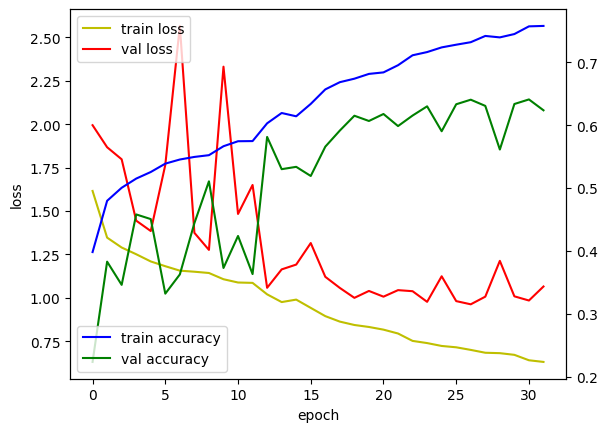

In [ ]:
# 5. 모델 학습과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label = 'train loss')
loss_ax.plot(history.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(history.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

229/229 [==============================] - 1s 3ms/step - loss: 0.9625 - accuracy: 0.6404
Accuracy of our model on test data :  64.04494643211365 %


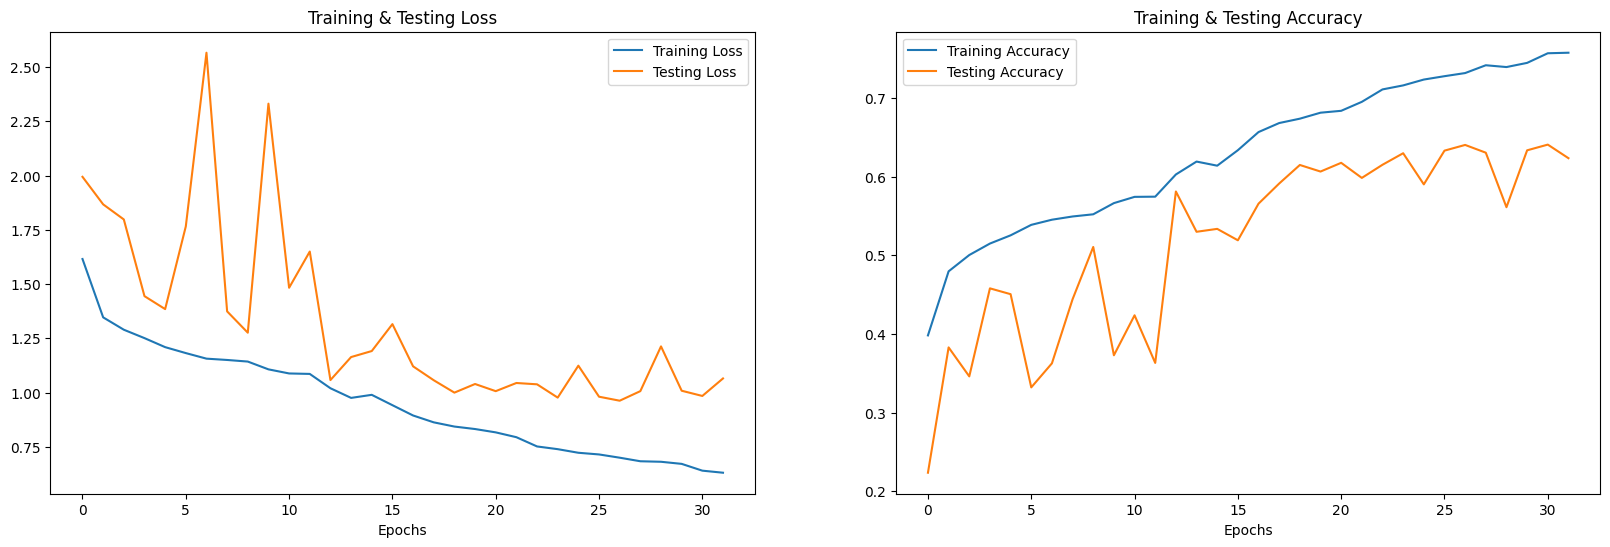

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

'''epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()'''

#2차 수정
# Calculate the actual number of epochs based on the available data
num_epochs = len(train_loss)
epochs = [i for i in range(num_epochs)]

fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20, 6)
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
#1차 수정
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

229/229 [==============================] - 1s 2ms/step


,Predicted Labels,Actual Labels
0,neutral,fear
1,happy,happy
2,fear,fear
3,neutral,sad
4,angry,angry
5,fear,sad
6,sad,sad
7,happy,happy
8,neutral,neutral
9,neutral,happy


In [ ]:
df0

,Predicted Labels,Actual Labels
0,neutral,fear
1,happy,happy
2,fear,fear
3,neutral,sad
4,angry,angry
...,...,...
7293,angry,angry
7294,fear,fear
7295,happy,angry
7296,happy,fear


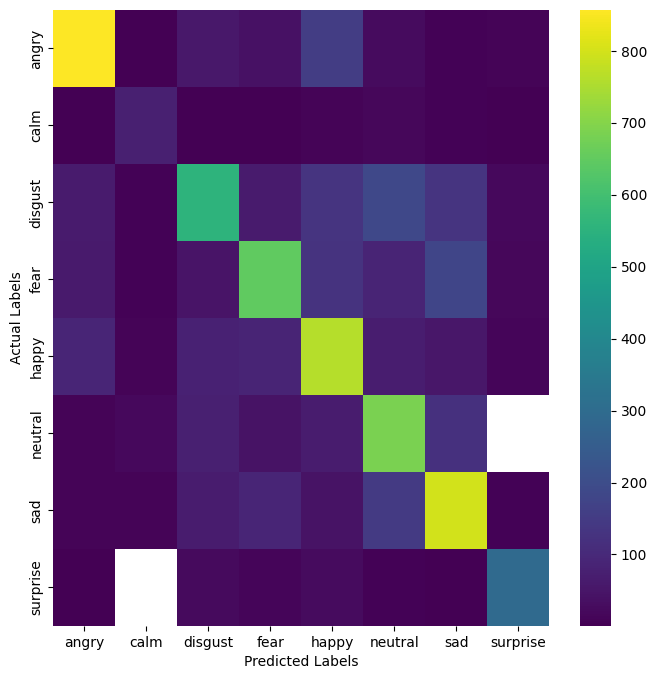

In [ ]:
# @title Predicted Labels vs Actual Labels

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Actual Labels'].value_counts()
    for x_label, grp in df0.groupby('Predicted Labels')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Predicted Labels')
_ = plt.ylabel('Actual Labels')

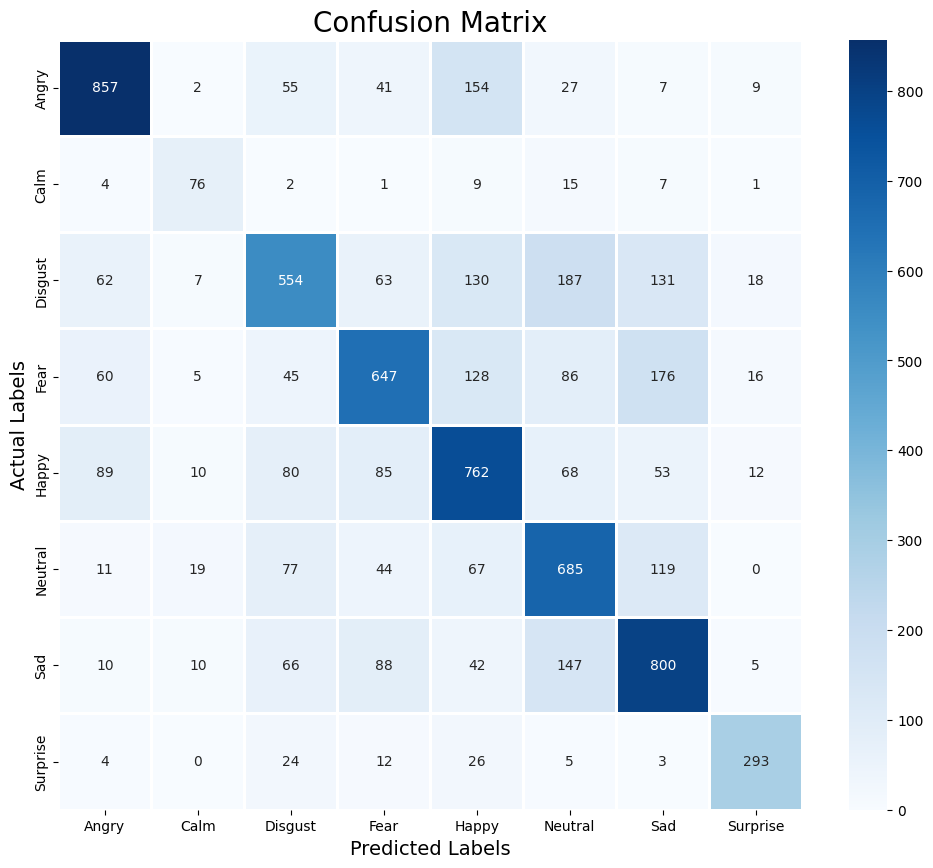

In [ ]:
#1차 수정
'''from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))'''

#2차 수정
'''from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))

# Check the number of unique categories in y_test0 and y_pred0
num_categories = len(np.unique(y_test0))

# Adjust the DataFrame creation to match the actual number of categories
cm = pd.DataFrame(cm , index = [i for i in range(num_categories)] , columns = [i for i in range(num_categories)])

# Optionally, map the integer labels back to original categories if needed
# category_mapping = {i: category for i, category in enumerate(encoder.categories_[0])}  # Assuming encoder.categories_ is a list of lists
# cm.rename(index=category_mapping, columns=category_mapping, inplace=True)

sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))'''

#3차 수정
'''cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
num_categories = len(np.unique(y_test0))  # Assuming encoder.categories_ is a list of lists
#cm = pd.DataFrame(cm , index = [i for i in num_categories] , columns = [i for i in num_categories]) range 함수 사용해야함
cm = pd.DataFrame(cm , index = [i for i in range(num_categories)] , columns = [i for i in range(num_categories)])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()'''

#4차 수정
# 감정 레이블 정의
emotion_labels = ['Angry', 'Calm', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# 혼동 행렬 생성
cm = confusion_matrix(y_test0, y_pred0)

# 데이터프레임으로 변환 (인덱스와 컬럼에 감정 레이블 사용)
cm = pd.DataFrame(cm, index=emotion_labels, columns=emotion_labels)

# 히트맵 플롯
plt.figure(figsize=(12, 10))
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='d')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test0, y_pred0))

              precision    recall  f1-score   support

       angry       0.78      0.74      0.76      1152
        calm       0.59      0.66      0.62       115
     disgust       0.61      0.48      0.54      1152
        fear       0.66      0.56      0.60      1163
       happy       0.58      0.66      0.62      1159
     neutral       0.56      0.67      0.61      1022
         sad       0.62      0.68      0.65      1168
    surprise       0.83      0.80      0.81       367

    accuracy                           0.64      7298
   macro avg       0.65      0.66      0.65      7298
weighted avg       0.65      0.64      0.64      7298

